In [1]:
import os
import cv2
import math
#import pafy
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
'''
This is a Python script that imports several libraries including OpenCV, TensorFlow, and MoviePy, and defines several functions 
to work with image and video data. It also imports some basic Python libraries such as NumPy and datetime, and sets up inline
plotting with matplotlib.
'''

'\nThis is a Python script that imports several libraries including OpenCV, TensorFlow, and MoviePy, and defines several functions \nto work with image and video data. It also imports some basic Python libraries such as NumPy and datetime, and sets up inline\nplotting with matplotlib.\n'

In [2]:

from sklearn.model_selection import train_test_split
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
'''
This is a Python script that imports several functions from TensorFlow and scikit-learn libraries. 
It imports the train_test_split function from scikit-learn for splitting data into training and testing sets, and 
several functions from TensorFlow including layers, models, and callbacks for building and training neural networks.
It also imports to_categorical function for converting labels into one-hot encoded vectors, and plot_model function 
for visualizing the architecture of a model.
'''

In [3]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)


In [ ]:
'''
This is a Python code that sets the random seed for NumPy, random, and TensorFlow libraries. 
The constant seed_constant is used as the seed value, and by setting the seed value, the random number generation in these
libraries will be reproducible, meaning that the same sequence of random numbers will be generated every time the code 
is run with the same seed value. This is useful for debugging and ensuring consistent results.
'''

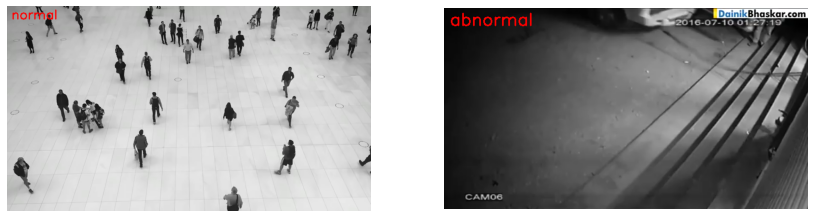

In [4]:
# Create a Matplotlib figure
plt.figure(figsize = (30, 30))
 
# Get Names of all classes in UCF50
all_classes_names = os.listdir('UCF50')
 
# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)), 2)
 
# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):
 
    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]
 
    # Getting a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'UCF50/{selected_class_Name}')
 
    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)
 
    # Reading the Video File Using the Video Capture
    video_reader = cv2.VideoCapture(f'UCF50/{selected_class_Name}/{selected_video_file_name}')
     
    # Reading The First Frame of the Video File
    _, bgr_frame = video_reader.read()
 
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()
 
    # Converting the BGR Frame to RGB Frame 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
 
    # Adding The Class Name Text on top of the Video Frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
     
    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

In [ ]:
'''
This is a Python code that creates a Matplotlib figure and displays a random sample of two videos from the UCF50 dataset. 
The UCF50 dataset contains video clips of human actions, and each clip is classified into one of 50 classes.

The code starts by getting a list of all class names in the UCF50 dataset. Then, it generates a random sample of two 
class names and selects a random video file from each class.

For each selected video file, the code reads the first frame of the video using OpenCV's VideoCapture function, 
converts the BGR frame to an RGB frame, adds the class name text on top of the frame using OpenCV's putText function, 
and displays the frame on a subplot of the Matplotlib figure.

The code iterates through both selected videos and displays them side by side in the figure. 
The resulting figure has a total of 8 subplots, with each subplot showing a different frame from one of the two selected videos.
'''

In [5]:
image_height, image_width = 64, 64
max_images_per_class = 400
 
dataset_directory = "UCF50"
classes_list = ["Abnormal","Normal"]
 
model_output_size = len(classes_list)

In [ ]:
'''
This is a Python code that sets up some variables for later use in the code.

image_height and image_width are set to 64, which is the size of the input images that will be used to train a 
deep learning model.

max_images_per_class is set to 400, which is the maximum number of images that will be used per class for training the model.

dataset_directory is set to "UCF50", which is the directory containing the UCF50 dataset.

classes_list is a list containing the two class names ("Abnormal" and "Normal") that will be used for training the model.

model_output_size is set to 2, which is the number of output classes for the model. This is equal to the length of classes_list
'''

In [6]:
def frames_extraction(video_path):
    # Empty List declared to store video frames
    frames_list = []
     
    # Reading the Video File Using the VideoCapture
    video_reader = cv2.VideoCapture(video_path)
 
    # Iterating through Video Frames
    while True:
 
        # Reading a frame from the video file 
        success, frame = video_reader.read() 
 
        # If Video frame was not successfully read then break the loop
        if not success:
            break
 
        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
         
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
         
        # Appending the normalized frame into the frames list
        frames_list.append(normalized_frame)
     
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()
 
    # returning the frames list 
    return frames_list

In [ ]:
'''
This is a Python function that extracts frames from a video file and returns a list of these frames. 
The function takes in the path of the video file as an argument.

The function starts by initializing an empty list called frames_list, which will store the video frames.

Next, the function uses OpenCV's VideoCapture function to read frames from the video file one by one. 
The frames are resized to a fixed size of image_height and image_width, which are set to 64 in the previous code block.

After resizing, the frame is normalized by dividing it with 255 so that each pixel value lies between 0 and 1. 
The normalized frame is then appended to the frames_list.

The function continues to read frames from the video file and repeat the above process until all frames have been read. 
Once all frames have been read, the function releases all resources and returns the frames_list.
'''

In [7]:
def create_dataset():
 
    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    labels = []
     
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
         
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))
 
        # Iterating through all the files present in the files list
        for file_name in files_list:
 
            # Construct the complete video path
            video_file_path = os.path.join(dataset_directory, class_name, file_name)
 
            # Calling the frame_extraction method for every video file path
            frames = frames_extraction(video_file_path)
 
            # Appending the frames to a temporary list.
            temp_features.extend(frames)
         
        # Adding randomly selected frames to the features list
        features.extend(random.sample(temp_features, max_images_per_class))
 
        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * max_images_per_class)
         
        # Emptying the temp_features list so it can be reused to store all frames of the next class.
        temp_features.clear()
 
    # Converting the features and labels lists to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  
 
    return features, labels

In [ ]:
'''
This is a function called create_dataset() which is used to extract features and labels from the videos of the UCF50 dataset.

Here's how the function works:

> The function first initializes two empty lists called temp_features and features and one empty list called labels 
to store the features and labels values.
> It then iterates through all the classes mentioned in the classes_list.
> For each class, it gets the list of video files present in the specific class name directory.
> It then iterates through all the files present in the files list.
> For each video file path, it calls the frames_extraction() function to extract the frames from the video.
> It then adds the frames to a temporary list called temp_features.
> It adds randomly selected frames from temp_features to the features list and adds a fixed number of labels 
to the labels list for that particular class.
> It then clears the temp_features list so it can be reused to store all frames of the next class.
Finally, it converts the features and labels lists to numpy arrays and returns them.
'''

In [8]:
features, labels = create_dataset()

Extracting Data of Class: Abnormal
Extracting Data of Class: Normal


In [ ]:
'''
The create_dataset() function takes a while to execute since it extracts frames from all the videos in the UCF50 dataset, 
and then creates a balanced dataset with a fixed number of frames from each class. 
Depending on the number of videos in the dataset, this process can take several minutes. Once the function has completed, 
it returns the features and labels arrays, which contain the extracted frames and corresponding class labels, respectively.
'''

In [9]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [ ]:
'''
This code uses Keras's to_categorical method to convert labels into one-hot-encoded vectors. 
One-hot encoding is a process of converting categorical data into a format that can be easily understood and processed
by machine learning algorithms. In this case, the to_categorical method is applied to the labels array, which contains
the class labels for each image in the dataset. The resulting one_hot_encoded_labels variable will contain 
the one-hot-encoded vectors for each class label.
'''

In [10]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.2, shuffle = True, random_state = seed_constant)


In [ ]:
'''
The train_test_split function from Scikit-learn is used to split the dataset into training and testing sets.
features are the input features and one_hot_encoded_labels are the output labels. The test_size parameter is set to 0.2,
which means that 20% of the data is used for testing and the remaining 80% is used for training. 
shuffle is set to True, which shuffles the data before splitting, and the random_state is set to seed_constant 
to ensure reproducibility. The split data is returned as features_train, features_test, labels_train, and labels_test.
'''

In [11]:
# Let's create a function that will construct our model
def create_model():
 
    # We will use a Sequential model for model construction
    model = Sequential()
 
    # Defining The Model Architecture
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(model_output_size, activation = 'softmax'))
 
    # Printing the models summary
    model.summary()
 
    return model
 
 
# Calling the create_model method
model = create_model()
 
print("Model Created Successfully!")
model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                        

In [ ]:
'''
The model architecture includes two 2D convolutional layers with 64 filters each, a batch normalization layer, 
a max pooling layer, a global average pooling layer, a dense layer with 256 units, another batch normalization layer, 
and finally a dense output layer with softmax activation. 
The model takes input images of size 64x64x3. The total number of parameters in the model is 255,811.
'''

# more explaination
'''
The model architecture is a Convolutional Neural Network (CNN) consisting of several layers. 
The first layer is a Conv2D layer with 64 filters and a kernel size of 3x3. The activation function used in this layer is the
Rectified Linear Unit (ReLU) function. The input shape of the layer is the dimensions of the image 
(height, width, and number of channels) which are 64x64x3. The second layer is also a Conv2D layer with 64 filters and 
a kernel size of 3x3. The activation function used in this layer is also the ReLU function. Then, there is a BatchNormalization
layer to normalize the output of the previous layer. This is followed by a MaxPooling2D layer with a pool size of 2x2 to 
reduce the dimensions of the output. Then, there is a GlobalAveragePooling2D layer to reduce the dimensions further. 
The output of this layer is then fed to a Dense layer with 256 neurons and the activation function used is the ReLU function. 
This is followed by another BatchNormalization layer. Finally, there is another Dense layer with a number of neurons equal 
to the number of classes (2 in this case) and the activation function used is the Softmax function.
'''

In [12]:
# Adding Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])
 
# Start Training
model_training_history = model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/50
128/128 [==============================] - 13s 89ms/step - loss: 0.3674 - accuracy: 0.8555 - val_loss: 0.7112 - val_accuracy: 0.4219
Epoch 2/50
128/128 [==============================] - 11s 86ms/step - loss: 0.2780 - accuracy: 0.8906 - val_loss: 0.8233 - val_accuracy: 0.3828
Epoch 3/50
128/128 [==============================] - 11s 85ms/step - loss: 0.2724 - accuracy: 0.8711 - val_loss: 2.1233 - val_accuracy: 0.4609
Epoch 4/50
128/128 [==============================] - 11s 85ms/step - loss: 0.2313 - accuracy: 0.9102 - val_loss: 1.1137 - val_accuracy: 0.4688
Epoch 5/50
128/128 [==============================] - 11s 85ms/step - loss: 0.2410 - accuracy: 0.9043 - val_loss: 0.1775 - val_accuracy: 0.9609
Epoch 6/50
128/128 [==============================] - 11s 82ms/step - loss: 0.2742 - accuracy: 0.8711 - val_loss: 0.2689 - val_accuracy: 0.9453
Epoch 7/50
128/128 [==============================] - 10s 82ms/step - loss: 0.1914 - accuracy: 0.9238 - val_loss: 0.4264 - val_accuracy:

In [ ]:
'''
In the above code, we added an early stopping callback to the model to prevent overfitting. 
The EarlyStopping callback monitors the validation loss, and if it does not improve for a certain number of epochs
(determined by the patience parameter), the training stops early.

After adding the callback, we compiled the model using categorical cross-entropy loss as the loss function, 
Adam optimizer as the optimizer, and accuracy as the metric.

We then started the model training using the fit method, passing the training data (features_train and labels_train) as input.
We set the number of epochs to 50, batch size to 4, and validation split to 0.2 (20% of the training data is used for validation).
We also passed the early stopping callback to the callbacks parameter so that it can be used during the training.

Finally, we stored the training history in the model_training_history variable.
'''

In [13]:
model_evaluation_history = model.evaluate(features_test, labels_test)

5/5 [==============================] - 1s 115ms/step - loss: 0.0638 - accuracy: 0.9875


In [ ]:
'''
This line of code evaluates the trained model on the testing dataset to obtain the overall accuracy of the model. 
The model.evaluate() method returns a list of two values: the testing loss and the testing accuracy.

The first argument of the method is the testing features (i.e., features_test) and the second argument is the testing labels
(i.e., labels_test).

Note that the accuracy obtained on the testing dataset provides a metric of how well the model performs on unseen data,
and is a good way to ensure that the model is not overfitting to the training dataset.
'''

In [14]:
# Creating a useful name for our model, incase you're saving multiple models (OPTIONAL)
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
model_name = f'Model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'
 
# Saving your Model
model.save(model_name)

In [ ]:
'''
This code saves the trained model to a file with a name that includes the current date and time,
as well as the model's evaluation loss and accuracy. The model.save() method is used to save the model to a file 
in the Hierarchical Data Format (HDF5) format with the .h5 extension. 
This allows you to load the model later and use it for making predictions on new data.
'''

In [15]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]
 
  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
   
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
   
  # Adding title to the plot
  plt.title(str(plot_name))
 
  # Adding legend to the plot
  plt.legend()

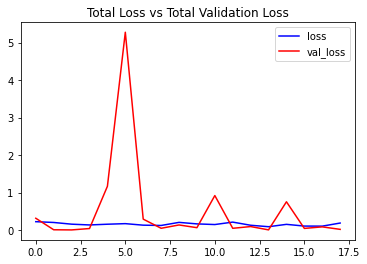

In [83]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

In [ ]:
'''
This will show a graph with the training and validation loss on the y-axis and the number of epochs on the x-axis. 
The blue line represents the training loss and the red line represents the validation loss. 
The graph shows how the loss decreases over time as the model trains. The goal is to have both lines decrease, 
but not to overfit the training data by having the validation loss increasing while the training loss decreases.
'''

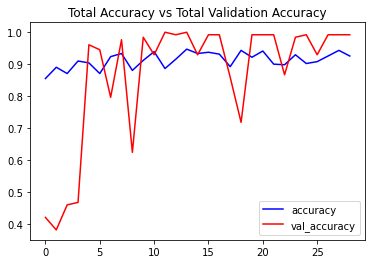

In [16]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')


In [17]:
def predict_on_live_video(video_file_path, output_file_path, window_size,frame_skip):
    frame_count = 0
 
    # Initialize a Deque Object with a fixed size which will be used to implement moving/rolling average functionality.
    predicted_labels_probabilities_deque = deque(maxlen = window_size)
 
    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)
 
    # Getting the width and height of the video 
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
    # Writing the Overlayed Video Files Using the VideoWriter Object
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 24, (original_video_width, original_video_height))
 
    while True: 
 
        # Reading The Frame
        #status, frame = video_reader.read() 
        
         # Reading The Frame
        status, frame = video_reader.read() 

        # skip frames
        if frame_count % frame_skip != 0:
            frame_count += 1
            continue
        
        if not status:
            break

        # rest of the processing code...
        
        # Writing The Frame
        video_writer.write(frame)
        frame_count += 1
 
       # if not status:
        #    break
 
        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
         
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
 
        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]
 
        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_deque.append(predicted_labels_probabilities)
 
        # Assuring that the Deque is completely filled before starting the averaging process
        if len(predicted_labels_probabilities_deque) == window_size:
 
            # Converting Predicted Labels Probabilities Deque into Numpy array
            predicted_labels_probabilities_np = np.array(predicted_labels_probabilities_deque)
 
            # Calculating Average of Predicted Labels Probabilities Column Wise 
            predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)
 
            # Converting the predicted probabilities into labels by returning the index of the maximum value.
            predicted_label = np.argmax(predicted_labels_probabilities_averaged)
 
            # Accessing The Class Name using predicted label.
            predicted_class_name = classes_list[predicted_label]
           
            # Overlaying Class Name Text Ontop of the Frame
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
 
        # Writing The Frame
        video_writer.write(frame)
 
 
        # cv2.imshow('Predicted Frames', frame)
 
        # key_pressed = cv2.waitKey(10)
 
        # if key_pressed == ord('q'):
        #     break
 
    # cv2.destroyAllWindows()
 
     
    # Closing the VideoCapture and VideoWriter objects and releasing all resources held by them. 
    video_reader.release()
    video_writer.release()

In [18]:
input_video_file_path = "y2mate.com - Misbehave to female banker by customer in bank of baroda_360p.mp4" 
input_video_file_path

'y2mate.com - Misbehave to female banker by customer in bank of baroda_360p.mp4'

In [19]:
window_size = 25
 
# Constructing The Output YouTube Video Path
output_video_file_path = "{window_size}.mp4"

In [20]:
# Calling the predict_on_live_video method to start the Prediction.
predict_on_live_video(input_video_file_path, output_video_file_path, window_size,5)
 
# Play Video File in the Notebook
VideoFileClip(output_video_file_path).ipython_display(width = 700)

1/1 [==============================] - 0s 49ms/step
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [93]:
# Play Video File in the Notebook
#VideoFileClip(output_video_file_path).ipython_display(width = 100)
from moviepy.editor import *
  
# loading video dsa gfg intro video 
clip = VideoFileClip(output_video_file_path)
  
# getting subclip from it
clip1 = clip.subclip(0, 10)
  
# showing final clip
clip1.ipython_display(width = 480)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
